In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset_train.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
X = dataset_train.iloc[: , 1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [8]:
x_train = []
y_train = []
for i in range(60 ,1258 ):
  x_train.append(X[i-60:i,0])
  y_train.append(X[i,0])

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
X.shape

(1258, 1)

In [10]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1],1))

In [11]:
x_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor  = Sequential()
regressor.add(LSTM(units=50 , return_sequences=True, input_shape = (x_train.shape[1] , 1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.1))

In [14]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [15]:
regressor.compile(optimizer='adam' , loss='mean_squared_error')

In [16]:
regressor.fit(x_train , y_train , epochs=200,batch_size=32)

Epoch 1/200
38/38 [==============================] - 1s 14ms/step - loss: 0.0478
Epoch 2/200
38/38 [==============================] - 1s 13ms/step - loss: 0.0057
Epoch 3/200
38/38 [==============================] - 1s 13ms/step - loss: 0.0052
Epoch 4/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0050
Epoch 5/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 6/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0045
Epoch 7/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 8/200
38/38 [==============================] - 1s 13ms/step - loss: 0.0048
Epoch 9/200
38/38 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 10/200
38/38 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 11/200
38/38 [==============================] - 1s 13ms/step - loss: 0.0047
Epoch 12/200
38/38 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 13/200
38/38 [=====

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [18]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [20]:
dataset_test.shape

(20, 6)

In [21]:
real_stock_price = dataset_test.iloc[: , 1:2].values

In [22]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [24]:
dataset_total = pd.concat((dataset_train['Open'] , dataset_test['Open']) , axis = 0)

In [26]:
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [27]:
dataset_total.shape

(1278,)

In [28]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60: ].values

In [29]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [30]:
inputs = inputs.reshape(-1,1)

In [31]:
inputs.shape

(80, 1)

In [32]:
inputs = sc.transform(inputs)

In [33]:
inputs[0]

array([0.9299055])

In [34]:
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i , 0])
x_test = np.array(x_test)

In [35]:
x_test.shape

(20, 60)

In [36]:
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [37]:
x_test.shape

(20, 60, 1)

In [38]:
predicted_stock_price = regressor.predict(x_test)

In [39]:
predicted_stock_price

array([[0.95383465],
       [0.9497634 ],
       [0.9607526 ],
       [0.96024466],
       [0.9691658 ],
       [0.9851732 ],
       [0.9891015 ],
       [0.9848461 ],
       [0.9876529 ],
       [0.9909198 ],
       [0.99169064],
       [0.9905497 ],
       [0.9900588 ],
       [0.99290884],
       [0.99433434],
       [1.0131923 ],
       [1.0258633 ],
       [1.0359977 ],
       [1.0335191 ],
       [1.0097803 ]], dtype=float32)

In [40]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [41]:
predicted_stock_price

array([[791.86334],
       [789.6748 ],
       [795.58215],
       [795.3091 ],
       [800.10474],
       [808.7097 ],
       [810.8214 ],
       [808.5339 ],
       [810.04266],
       [811.7988 ],
       [812.2132 ],
       [811.59985],
       [811.336  ],
       [812.86804],
       [813.63434],
       [823.7716 ],
       [830.58307],
       [836.03094],
       [834.69855],
       [821.93744]], dtype=float32)

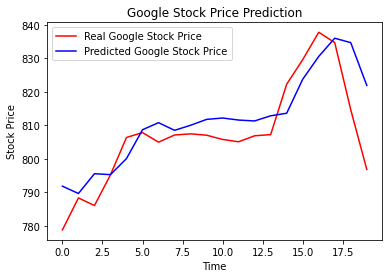

In [43]:
plt.plot(real_stock_price , color='red' , label='Real Google Stock Price')
plt.plot(predicted_stock_price , color='blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Thank you!!